In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [ ]:
# load data
df = pd.read_csv('covid_tweets_random_sampled_5perc.csv',lineterminator='\n')
df

In [3]:
# load & calculate vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
sent = df['text'].apply(analyzer.polarity_scores).apply(pd.Series)

In [4]:
# merge results with original df
df = df.merge(sent,left_index=True,right_index=True,how='inner')
df.date = pd.to_datetime(df.date)
df.time = df.date
df.date = df.time.dt.date

In [6]:
# daily average
sent_vader_compound = df.groupby('date')['compound'].mean()

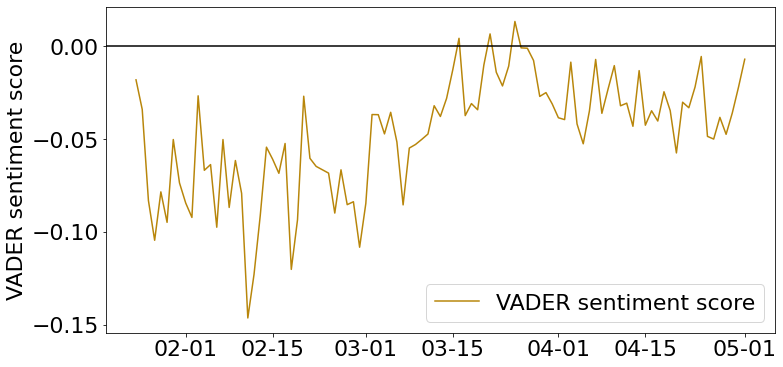

In [15]:
# plot
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(12, 6))

plt.plot(sent_vader_compound[pd.Timestamp('2020-01-24'):pd.Timestamp('2020-05-01')],color='darkgoldenrod',label='VADER sentiment score')

plt.axhline(y=0,color='black')
plt.ylabel('VADER sentiment score')
plt.legend()
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)